# To predict the onset of diabetes

### The datasets used for this project is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of this project is to predict whether or not a participant is diabetic.  All participants of the dataset are females of Pima Indian heritage that are at least 21 years old.   The attributes of this dataset are based on diagnostic measurements such as blood pressure and BMI. The dataset used in this project can be found at https://www.kaggle.com/uciml/pima-indians-diabetes-database.  

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

In [3]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c636fc76e81e44bd8261ef4e4e5bb742 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PCp4gjbfiZzTj3q_VCmrycSQ59NUS3JGrMduFIbNqTNV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c636fc76e81e44bd8261ef4e4e5bb742)

body = client_c636fc76e81e44bd8261ef4e4e5bb742.get_object(Bucket='diabetes-donotdelete-pr-mokrha3rukksix',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().values.any()    # Check if Null values are present in dataset 

False

In [57]:
data.describe()              # Describe data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualisation

In [60]:
data.groupby('Outcome').mean()     # Group data by Outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
data['Outcome'].value_counts()    # 0 stands for Non Diabetic and 1 stands for Diabetic

0    500
1    268
Name: Outcome, dtype: int64

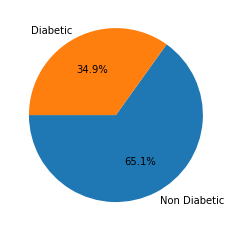

In [24]:
labels = 'Non Diabetic','Diabetic'
plt.pie(data['Outcome'].value_counts(),autopct='%1.1f%%', startangle=180, labels=labels);


####  Looking at this Pie Chart we see that there is a greater percentage of participants that are Non Diabetic than there are Diabetic.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

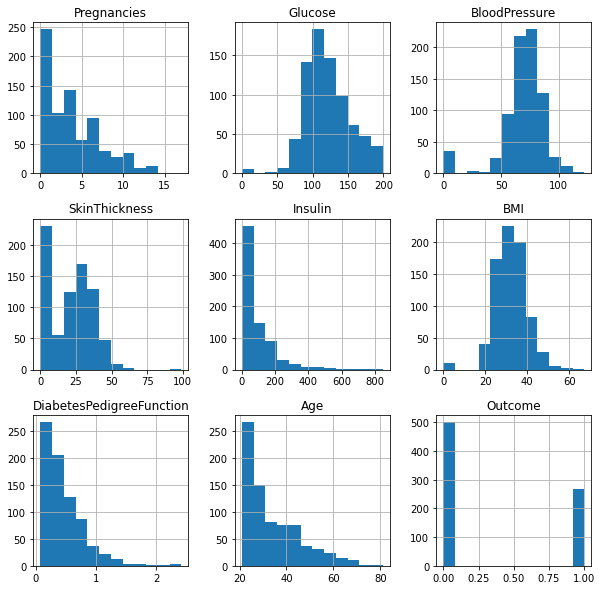

In [58]:
data.hist(figsize=(10,10), bins=12)

#### We observe that the distribution of Glucose and BloodPressure are normally distributed. The diistribution of all other attributes are skewed. 

<AxesSubplot:>

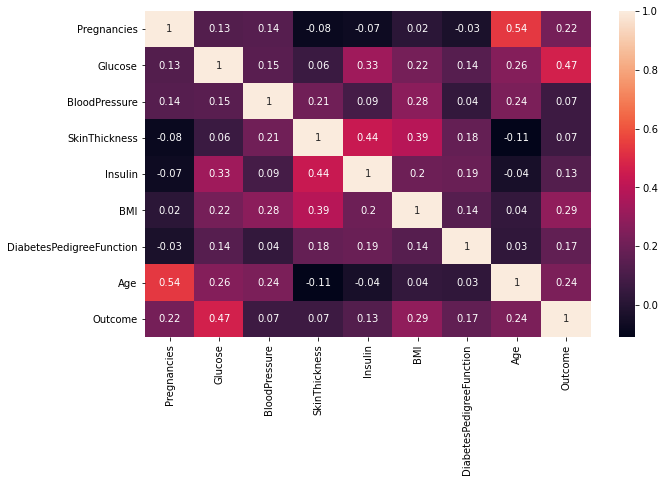

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().round(2),annot=True)   

#### We observe that there is a correlation between Outcome and the attributes Glucose, Age, BMI and Pregnancies. 

### Data Standardisation

In [71]:
X = data.drop(columns='Outcome', axis=1)  # Consists of all attributes in dataset but Outcome
Y = data['Outcome']  # Consists only of the attribute Outcome

In [35]:
scaler = StandardScaler()          # To standardise the dataset X
scaler.fit(X)
standardised_X = scaler.transform(X)
X = standardised_X

In [36]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Dividing the date into training data and test data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)   # We set the test data to be 20% of our data 
                                                                                                      # stratify=Y data is slit by dataset Y (by Outcome)

### Model training 

In [46]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)  # training the support vector Machine Classifier

SVC(kernel='linear')

### Model evaluation 

In [50]:
#To find accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.7866449511400652

#### The accuracy score on the training data is 78.66 %.

In [51]:
#To find accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.7727272727272727

#### The accuracy score on the test data is 77.27  %.